In [1]:
%matplotlib inline

In [2]:
import numpy as np
import torch
from IPython import display
from matplotlib import pyplot as plt
import random

In [3]:
num_inputs=2
samples=1000
true_w=torch.tensor([[2.3],[4.2]],dtype=torch.float32)
true_b=torch.tensor([5.5],dtype=torch.float32)

In [9]:
train_data=torch.randn(samples,num_inputs,dtype=torch.float32)
labels=torch.mm(train_data,true_w)+true_b
labels+=torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float32)

In [10]:
print(train_data[0],labels[0])

tensor([ 0.2771, -1.1175]) tensor([1.4517])


In [14]:
def use_svg_display():
    display.set_matplotlib_formats("svg")
def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    plt.rcParams["figure.figsize"]=figsize

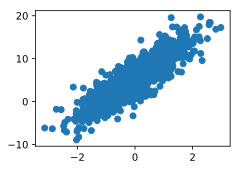

In [15]:
set_figsize()
plt.scatter(train_data[:,1].numpy(),labels.numpy())

In [16]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        j=torch.LongTensor(indices[i:min(num_examples,i+batch_size)])
        yield features.index_select(0,j),labels.index_select(0,j)

In [29]:
w=torch.rand(2,1,requires_grad=True,dtype=torch.float32)
b=torch.zeros(1,dtype=torch.float32,requires_grad=True)

In [24]:
def linreg(X,w,b):
    return torch.mm(X,w)+b

In [41]:
def squared_loss(y_hat,y):
    return ((y_hat-y.view(y_hat.size()))**2).mean()

In [26]:
def sgd(params,lr,batch_size):
    for param in params:
        param.data-=lr*param.grad/batch_size

In [45]:
lr=0.03
num_epochs=10
net=linreg
loss=squared_loss
batch_size=20

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,train_data,labels):
        l=loss(net(X,w,b),y)
        l.backward()
        sgd([w,b],lr,batch_size)
        
        w.grad.data.zero_()
        b.grad.data.zero_()
        
    train_l=loss(net(train_data,w,b),labels)
    print("epoch %d,loss %f"%(epoch+1,train_l))

epoch 1,loss 0.409413
epoch 2,loss 0.304459
epoch 3,loss 0.226441
epoch 4,loss 0.168446
epoch 5,loss 0.125326
epoch 6,loss 0.093261
epoch 7,loss 0.069416
epoch 8,loss 0.051680
epoch 9,loss 0.038487
epoch 10,loss 0.028672


In [46]:
w

tensor([[2.3225],
        [4.2316]], requires_grad=True)

In [47]:
b

tensor([5.6656], requires_grad=True)